## Problem 1

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

solar_model = open('solar_model.txt')

solar_radius = 6.9598E10
solar_mass = 1.9891E33
solar_luminosity = 3.8515E33
constant = 2.93E-33
lines = 25

index = np.zeros(lines)
radius = np.zeros(lines)
volume = np.zeros(lines)
log_density = np.zeros(lines)
density = np.zeros(lines)
log_temp = np.zeros(lines)
temp = np.zeros(lines)
mass = np.zeros(lines)
luminosity = np.zeros(lines)

X = np.zeros(lines)
Y = np.zeros(lines)

for i in range(4):
    solar_model.readline()

for i in range(lines):
    solar_model.read(3)
    index[i] = solar_model.read(2)
    solar_model.read(6)
    radius[i] = solar_model.read(4)
    solar_model.read(2)
    log_density[i] = solar_model.read(10)
    log_temp[i] = solar_model.read(13)
    X[i] = solar_model.read(9)
    solar_model.readline()

#print index

radius*=solar_radius
for i in range(lines):
    volume[i] = ((4/3)*np.pi*radius[i]**3)
    density[i] = 10**log_density[i]
    temp[i] = 10**log_temp[i]
    Y[i] = 1 - 0.02 - X[i]

for i in range(lines-1):
    j = i+1
    mass[j] = mass[j-1] + density[j]*(4*np.pi*(radius[j])**2)*(radius[j]-radius[j-1])
    luminosity[j] = luminosity[j-1] + constant*(X[j]**2)*density[j]*temp[j]**(4.5)*(mass[j]-mass[j-1])
    
for i in range(lines):
    if (luminosity[i] < 0.9*solar_luminosity):
        k = i+1

radius/=solar_radius
mass/=solar_mass
luminosity/=solar_luminosity


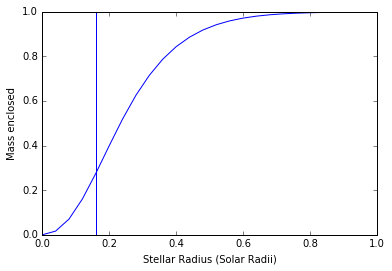

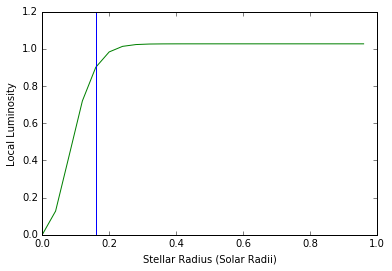

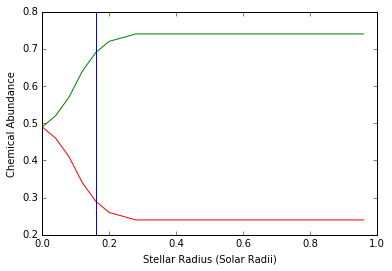

The fractional radius of the core is:  0.16


In [6]:
p1 = plt.plot(radius, mass, 'b')
p5 = plt.axvline(x=radius[k], ymin=0, ymax=1)
plt.xlabel('Stellar Radius (Solar Radii)')
plt.ylabel('Mass enclosed')
plt.show()
p2 = plt.plot(radius, luminosity, 'g')
plt.xlabel('Stellar Radius (Solar Radii)')
plt.ylabel('Local Luminosity')
p6 = plt.axvline(x=radius[k], ymin=0, ymax=1)
plt.show()
p3 = plt.plot(radius, X, 'g')
p4 = plt.plot(radius, Y, 'r')
p7 = plt.axvline(x=radius[k], ymin=0, ymax=1)
plt.xlabel('Stellar Radius (Solar Radii)')
plt.ylabel('Chemical Abundance')


plt.show()

print "The fractional radius of the core is: ", radius[k]
#The core ends at around 0.16 solar radii since that is when we have 90% of the stellar luminosity
#The star's enclosed mass at this point is about 0.275 solar masses

The core ends at around 0.16 solar radii since that is when we have 90% of the stellar luminosity. The star's enclosed mass at this point is about 0.275 solar masses.

## Problem 2

In [7]:
five_sol = open('Msol_model.txt')

lines_2 = 78
radius_2 = np.zeros(lines_2)
log_density_2 = np.zeros(lines_2)
log_temp_2 = np.zeros(lines_2)
log_pressure_2 = np.zeros(lines_2) #This is just the gas pressure
mass_2 = np.zeros(lines_2)
luminosity_2 = np.zeros(lines_2)

for i in range(4):
    five_sol.readline()

#This reads in the data for the 5 solar mass star
for i in range(lines_2):
    radius_2[i] = five_sol.read(10)
    log_density_2[i] = five_sol.read(10)
    log_temp_2[i] = five_sol.read(10)
    log_pressure_2[i] = five_sol.read(10)
    mass_2[i] = five_sol.read(12)
    luminosity_2[i] = five_sol.read(12)
    five_sol.readline()
    if (luminosity_2[i] < 0.9):
        j = i+1


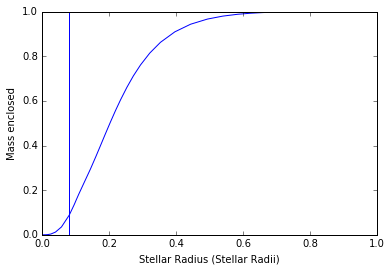

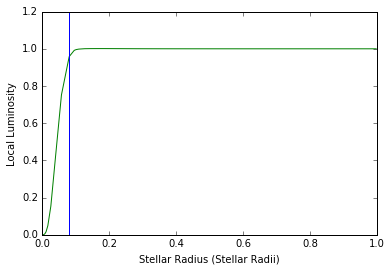

The fractional radius of the core is:  0.0806
The fractional mass of the core is:  0.08768
This gives us a mass of  0.4384 solar masses


In [8]:
#This is graphing information for the mass and luminosity of the 5 solar mass star
p3 = plt.plot(radius_2, mass_2, 'b')
plt.xlabel('Stellar Radius (Stellar Radii)')
plt.ylabel('Mass enclosed')
p8 = plt.axvline(x=radius_2[j], ymin=0, ymax=1)
plt.show()
p4 = plt.plot(radius_2, luminosity_2, 'g')
p9 = plt.axvline(x=radius_2[j], ymin=0, ymax=1)
plt.xlabel('Stellar Radius (Stellar Radii)')
plt.ylabel('Local Luminosity')

plt.show()

#This prints out the fractional radius when 90% of the luminosity has been generated
print "The fractional radius of the core is: ", radius_2[j]
print "The fractional mass of the core is: ", mass_2[j]
core_mass = 5*mass_2[j]
print "This gives us a mass of ", core_mass, "solar masses"

For this star the fractional radius of the core is much lower than for the sun in problem 1. This means that this star's core is much smaller compared to it's envelope than the sun. We can also see that a smaller portion of the star's total mass is enclosed in the core for this star as opposed to the sun.

## Problem 4

In [9]:
white_dwarf = open('WhiteDwarfData.txt')
lines_3 = 1386
G = 6.67E-8
for i in range(2):
    white_dwarf.readline()

m_dwarf = np.zeros(lines_3)
log_grav = np.zeros(lines_3)
grav = np.zeros(lines_3)
wd_rad = np.zeros(lines_3)

for i in range(lines_3):
    m_dwarf[i] = white_dwarf.read(11)
    log_grav[i] = white_dwarf.read(11)
    grav[i] = 10**log_grav[i]
    wd_rad[i] = (np.sqrt((G*m_dwarf[i]*solar_mass/grav[i])))/(solar_radius)
    white_dwarf.readline()

print wd_rad

[ 0.00541685  0.0146532   0.01335084 ...,  0.01699883  0.01780446
  0.03025899]


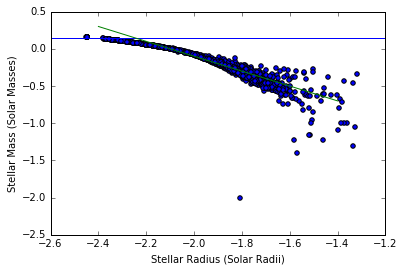

In [10]:
x_arr = range(2)
y_arr = range(2)
for i in range(2):
    x_arr[i] -= 2.4
    y_arr[i]*= -1/3
    y_arr[i] += 0.3

p10 = plt.scatter(np.log10(wd_rad), np.log10(m_dwarf))
plt.xlabel('Stellar Radius (Solar Radii)')
plt.ylabel('Stellar Mass (Solar Masses)')
p11 = plt.axhline(y=np.log10(1.4), xmin=0, xmax=1)
p12 = plt.plot(x_arr, y_arr, 'g')
plt.show()

(c)
All of the masses are below the chandrasekhar mass limit because for completely degenerate stars, the electron degeneracy pressure cannot support masses larger than this value. So, whenever there would be a star with a mass greater than this limit, the star will become dynamically unstable and result in a supernova. 

(d)
The significance of the -1/3 slope line over the data is that this slope is the exponent of the dependence of the radius of a white dwarf to it's mass. So, we see that for larger stellar radii, we have a lower mass star. This is contrary to what we would intuitively expect as we increase the mass of a star. 

## Problem 5

In [11]:
rotation = open('RotationalVelocitiesMainSequence.txt')
lines_4 = 9
stars = []
delta = np.zeros(lines_4)
m_rot = np.zeros(lines_4)
r_rot = np.zeros(lines_4)
rot = np.zeros(lines_4)
for i in range(2):
    rotation.readline()

for i in range(lines_4):
    stars.append(rotation.read(10))
    m_rot[i] = rotation.read(11)
    r_rot[i] = rotation.read(11)
    rot[i] = rotation.read(11)
    rot[i] *= 100000 #This is the conversion from km to cm
    rotation.readline()
    delta[i] = rot[i]*rot[i]*(r_rot[i])*(solar_radius)*(1/G)*(1/m_rot[i])*(1/solar_mass)

for i in range(lines_4):
    print stars[i],": ", delta[i]

        O5 :  0.0378749009689
      B2.5 :  0.0968230551085
        B5 :  0.135912928044
        A0 :  0.137107141507
        A7 :  0.115641433552
        F0 :  0.0437928542453
        F5 :  0.00318496891804
        G0 :  0.000711334705178
        G2 :  2.77504468318e-05


(b)
As we can see from our calculated delta values, the largest deviation from spherical symmetry occurs for stars in the range of early A stars.